<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговый-вывод:" data-toc-modified-id="Итоговый-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

1.1. Загрузка данных

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

Загрузим данные из файла /datasets/Churn.csv, выведем первые 10 строк таблицы для первого взгляда на данные.
Также с помощью метода info() изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.

In [5]:
# читаем данные из .csv файла с помощью метода read_csv()
users = pd.read_csv('/datasets/Churn.csv')
# выведем первые 10 строк таблицы с помощью метода head()
display(users.head(10))
# с помощью метода info() изучим структуры таблицы: типы данных, количество строк, столбцов, пропущенных данных.
users.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


1.2. Подготовка признаков

1) Признаки RowNumber, CustomerId и Surname не несут в себе информации, необходимой для дальнейшей классификации. Удалим их.

In [7]:
users = users.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

2) Посмотрим на распределения числовых признаков

In [8]:
def show_hists(data, data_label, num_bins, rug=False, log_scale=False):
    """
    input: data - данные для построения гистограммы
           data_label - описание данных
           num_bins - количество ячеек
    output: None
    description: Функция строит гистограмму и boxplot для выбранного параметра:
                - Плотность распределения (методом distplot() библиотеки seaborn)
                - Boxplot (метод boxplot() библиотеки seaborn)
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(data, bins=num_bins, rug=rug, ax=axes[0])
    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    sns.boxplot(data=users, x=data_label, ax=axes[1])
    plt.show()

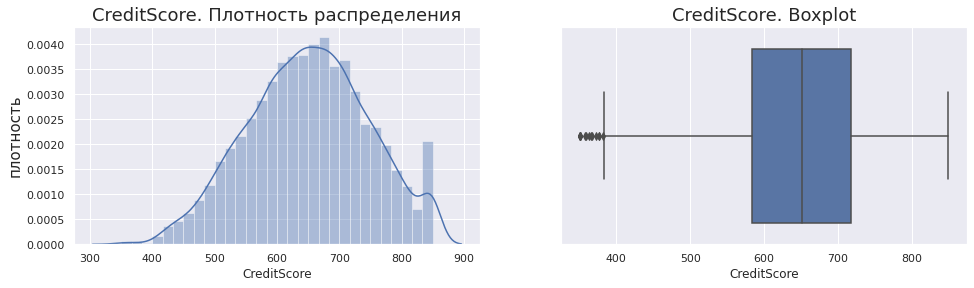

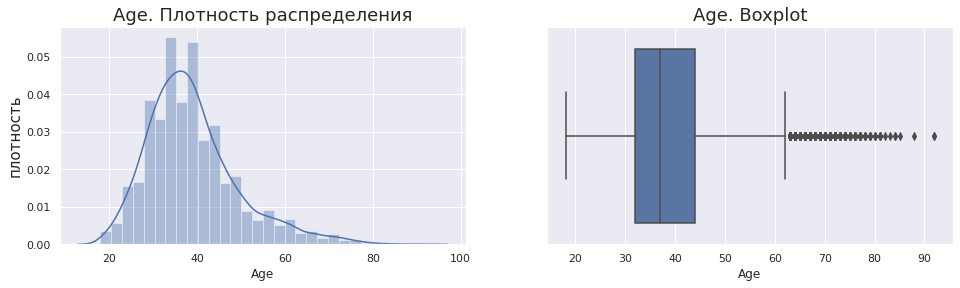

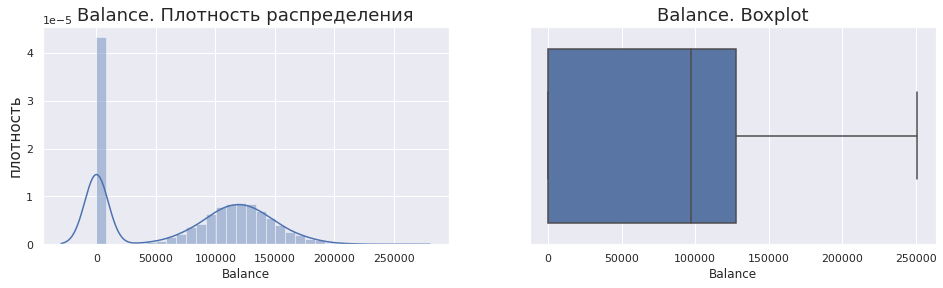

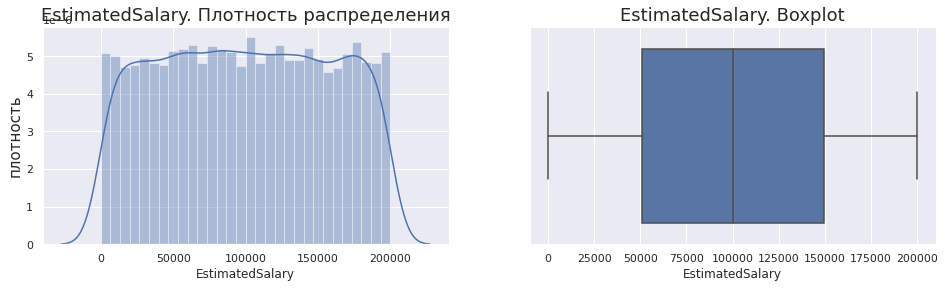

In [11]:
numerics = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for column in numerics:
    show_hists(users[column], column, num_bins=30)

В признаках CreditScore, Age есть выбросы. Найдём их долю от общего количества данных.

In [12]:
# квантили считаем методом quantile()
# граница выбросов считается по формуле  [ q.75 + (q.75 - q.25)*1.5 ]
max_age = (users['Age'].quantile(0.75) - users['Age'].quantile(0.25))*1.5 + users['Age'].quantile(0.75)
rate = round(len(users.loc[users['Age'] > max_age]) / len(users) * 100, 2)
print('Доля выбросов в параметре {}: {} %'.format('Age', rate))

Доля выбросов в параметре Age: 3.59 %


In [13]:
# граница выбросов считается по формуле  [ q.25 - (q.75 - q.25)*1.5 ]
min_score = users['CreditScore'].quantile(0.25) - \
            (users['CreditScore'].quantile(0.75) - users['CreditScore'].quantile(0.25))*1.5
rate = round(len(users.loc[users['CreditScore'] < min_score]) / len(users) * 100, 2)
print('Доля выбросов в параметре {}: {} %'.format('CreditScore', rate))

Доля выбросов в параметре CreditScore: 0.15 %


Общая доля выбросов небольшая (меньше 4%). Не будем пока их удалять.

3) Посмотрим на распределения категориальных признаков.

In [15]:
def show_hists(data, data_label1, data_label2=''):
    """
    input: data - данные для построения гистограммы
           data_label1,2 - названия признаков
    output: None
    description: Функция строит countplot для двух признаков
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label1 + ". CountPlot", fontsize=18)
    sns.countplot(data=users, x=data_label1, ax=axes[0])
    if data_label2 != '':
        axes[1].set_title(data_label2 + ". CountPlot", fontsize=18)
        sns.countplot(data=users, x=data_label2, ax=axes[1])
    plt.show()

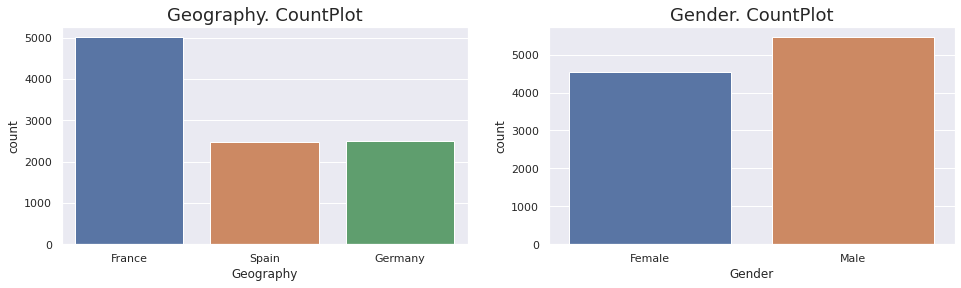

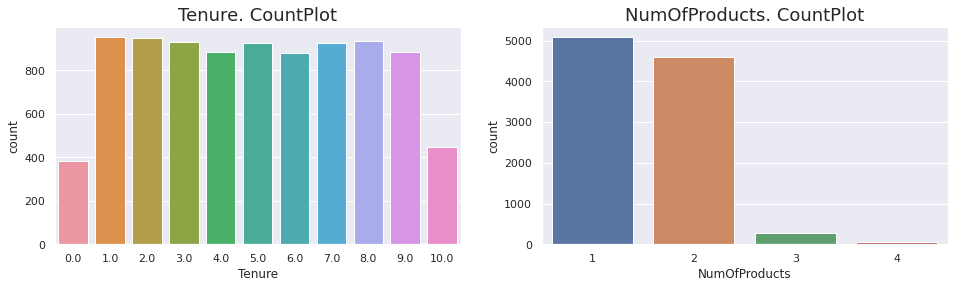

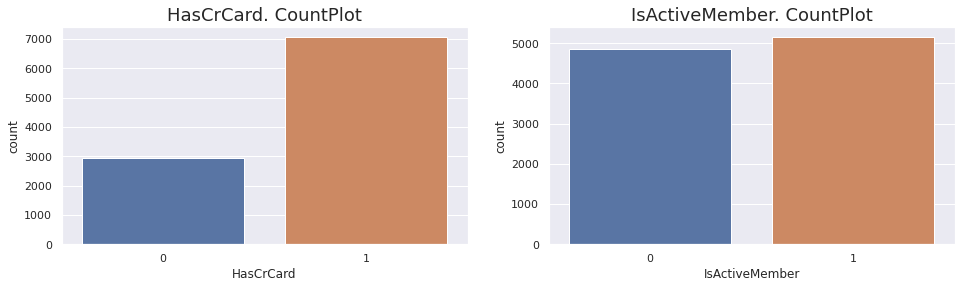

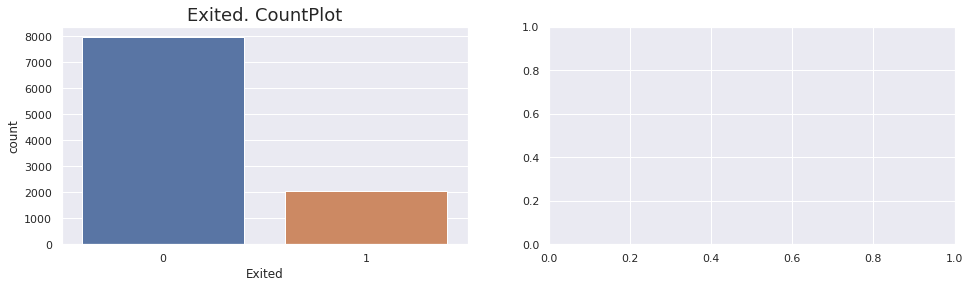

In [16]:
categoricals = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', '']
for i in range(len(categoricals)//2):
    show_hists(users, categoricals[2*i], categoricals[2*i+1])

Целевой признак Exited распределён примерно 4:1.
Количество категорий в признаках Geography, Gender небольшое. Преобразуем их методом One-Hot Encoding.

In [17]:
# для преобразования воспользуемся методом pd.get_dummies
# параметр drop_first=True для удаления избыточного столбца данных
users = pd.get_dummies(users, drop_first=True)

4) Преобразуем типы данных признаков NumOfProducts, HasCrCard, IsActiveMember, Exited в int8 для экономии места.

In [18]:
for column in ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']:
    users[column] = users[column].astype('int8')

1.3. Преобразование признака Tenure

В столбце Tenure есть пропущенные данные (около 10% пропусков). Данные могли отсутствовать изначально или быть утеряны из-за сбоев в системе при выгрузке базы.
Попробуем построить модель, предсказывающую данный параметр на основе имеющихся данных.

In [20]:
# основной целевой признак 'Exited' не будет участвовать в данной модели
features = features.drop('Exited', axis=1)

In [21]:
# в данной модели признак 'Tenure' выступает в качестве целевого
y = features['Tenure']
X = features.drop('Tenure', axis=1)
X = features[['EstimatedSalary', 'Age', 'CreditScore']]

In [22]:
# разделим данные на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=123)

Классификацию попробуем провести с помощью модели "Случайный Лес". Так как признак 'Tenure' распределён равномерно между 11 значениями, попробуем оценивать качество модели с помощью accuracy.

In [23]:
# в параметрах best_params и best_accuracy будем хранить наилучшие параметры для модели и наивысшую точность соответственно
best_params = []
best_accuracy = 0
# проходим в циклах по всем выбранным гиперпараметрам
for n_estimators in (1,10):
    for max_depth in range(2,10):
        for min_samples_split in range(2,10):
            for min_samples_leaf in range(1,8):
                for criterion in ['gini', 'entropy']:
                    # инициация модели с текущими гиперпараметрами
                    model_rf_clf = RandomForestClassifier(random_state=123,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion)
                    # обучение модели на тренировочной выборке
                    model_rf_clf.fit(X_train, y_train)
                    # поиск предсказаний модели на валидационной выбоке
                    predictions = model_rf_clf.predict(X_valid)
                    # вычисление точности модели методом accuracy_score
                    accuracy = accuracy_score(y_valid, predictions)
                    # если текущее значение точности выше предыдущего лучшего значения, 
                    # сохраняем параметры модели и текущую точность
                    if accuracy > best_accuracy:
                        best_params = [n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_accuracy = accuracy

In [24]:
# вывод наилучшей точности и параметров модели.
print('''Наилучшая точность: {}
Парамтеры модели:
   n_estimators = {}
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(round(best_accuracy, 2),
                             best_params[0],
                             best_params[1],
                             best_params[2],
                             best_params[3],
                             best_params[4]
                            ))

Наилучшая точность: 0.12
Парамтеры модели:
   n_estimators = 10
   max_depth = 5
   min_samples_split = 2
   min_samples_leaf = 2
   criterion = entropy 


Accuracy модели 12% слишком мал (случайный выбор между 11 классами даст около 9%). Другие модели классификации не улучшили качество классификации.
Регрессионные модели (представление Tenure количественным признаком) не дали положительного результата (r2 близок к 0 для LinearRegression и RandomForestRegressor).
В данном случае представим признак Tenure категориальным, преобразуем его методом One-Hot Encoding, пропущенные значения будут отдельной категорией.

In [25]:
users.loc[users['Tenure'].isna(), 'Tenure'] = -1
users['Tenure'] = users['Tenure'].astype('object')
users = pd.get_dummies(users, drop_first=True)

Выведем информацию о получившейся таблице.

In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Balance            10000 non-null  float64
 3   NumOfProducts      10000 non-null  int8   
 4   HasCrCard          10000 non-null  int8   
 5   IsActiveMember     10000 non-null  int8   
 6   EstimatedSalary    10000 non-null  float64
 7   Exited             10000 non-null  int8   
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Tenure_0.0         10000 non-null  uint8  
 12  Tenure_1.0         10000 non-null  uint8  
 13  Tenure_2.0         10000 non-null  uint8  
 14  Tenure_3.0         10000 non-null  uint8  
 15  Tenure_4.0         10000 non-null  uint8  
 16  Tenure_5.0         1000

In [27]:
display(users.head(10))

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
0,-0.326221,0.293517,-1.225848,1,1,1,0.021886,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.440036,0.198164,0.117350,1,0,1,0.216534,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,-1.536794,0.293517,1.333053,3,1,0,0.240687,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.501521,0.007457,-1.225848,2,0,0,-0.108918,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2.063884,0.388871,0.785728,1,1,1,-0.365276,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,-0.057205,0.484225,0.597329,2,1,0,0.863650,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,1.774174,1.056346,-1.225848,2,1,1,-1.565487,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,-2.840488,-0.946079,0.618019,4,1,0,0.334854,1,1,0,...,0,0,0,1,0,0,0,0,0,0
8,-1.547141,0.484225,1.050820,2,0,1,-0.437329,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0.346319,-1.136786,0.931463,1,1,1,-0.493230,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Выводы: Данные успешно загружены и проверены на соответствие описанию. Дубликатов нет. Типы данных преобразованы в соответствии с хранимой информацией
Признаки RowNumber, CustomerId и Surname удалены, так как целевой признак от них никак не зависит.
Были рассмотрены распределения признаков. В CreditScore, Age найдено около 4% выбросов. Пока оставлены как есть.
Числовые признаки приведены к стандартному виду (среднее = 0, стандартное отклонение = 1)
Категориальные признаки преобразованы методом One-Hot Encoder.
Целевой признак распределён в сооотношении 4:1
В признаке Tenure обнаружено около 10% пропусков. Попытка построить классификационную модель для заполнения пропусков не принесла существенных результатов (качество модели 12%, при случайном заполнении 9%). Данный признак преобразован прямым кодированием One-Hot Encoder.

## Исследование задачи

Для начала разделим данные на признаки и целевой признак

In [28]:
features = users.drop('Exited', axis=1)
target = users['Exited']

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1 соответственно (60% на обучающию и по 20% данных на валидационную и тестовую выборки).

In [29]:
# разделение проведём с помощью функции train_test_split библиотеки sklearn
X, X_test, y, y_test = train_test_split(features, target, test_size=0.2, random_state=123)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=123)

In [30]:
# выведем размеры получившихся выборок
print('Размеры наборов данных:')
print('X_train: ', X_train.shape)
print('X_valid: ', X_valid.shape)
print('X_test:  ', X_test.shape)

Размеры наборов данных:
X_train:  (6000, 21)
X_valid:  (2000, 21)
X_test:   (2000, 21)


Попробуем обучить различные классификационные модели без учёта дисбаланса классов.

2.1. Решающее дерево

Инициируем модель решающего дерева DecisionTreeClassifier
Выделим гиперпараметры для настройки модели:

max_depth - максимальная глубина древа

min_samples_split - минимальное количество объектов в узле

min_samples_leaf - минимальное количество объектов в листе

criterion ("gini" или "entropy") - функция измерения качества разделения

Критерием проверки качества модели будет f1 и roc_auc.

In [31]:
def decision_tree(X_train, X_valid, y_train, y_valid, cw=None):
    """
    input: X_train, X_valid, y_train, y_valid - обучающие и валидационные выборки признаков и целевого признака
            cw - параметр class_weight для модели решающего дерева
    output: None
    description: функция обучает модель решающего дерева DecisionTreeClassifier с различными сочетаниями гиперпараметров;
                 метрики качества модели: f1 и roc_auc;
                 функция выводит наилучшие значения метрик и значения гиперпараметров наилучшей модели.
    """
    # в параметрах best_params_f1 и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
    best_params_f1 = []
    best_f1 = 0
    # аналогично для roc_auc метрики.
    best_params_roc_auc = []
    best_roc_auc = 0.5
    # проходим в циклах по всем выбранным гиперпараметрам
    for max_depth in range(2,10):
        for min_samples_split in range(2,6):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    # инициация модели с текущими гиперпараметрами
                    model_dt_clf = DecisionTreeClassifier(random_state=123,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion,
                                                          class_weight=cw)
                    # обучение модели на тренировочной выборке
                    model_dt_clf.fit(X_train, y_train)
                    # поиск предсказаний модели на валидационной выбоке
                    predictions = model_dt_clf.predict(X_valid)
                    # вычисление f1 модели методом f1_score
                    f1 = f1_score(y_valid, predictions)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, 
                    # сохраняем параметры модели и текущую метрику f1
                    if f1 > best_f1:
                        best_params_f1 = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_f1 = f1
                    # аналогично для метрики roc_auc
                    roc_auc = roc_auc_score(y_valid, predictions)
                    if roc_auc > best_roc_auc:
                        best_params_roc_auc = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_roc_auc = roc_auc
    
    # вывод наилучшей метрики f1 и параметров модели.
    print('''Наилучшая метрика f1: {}
    Парамтеры модели:
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {}
       criterion = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))
    
    # вывод наилучшей метрики roc_auc и параметров модели.
    print('''Наилучшая метрика roc_auc: {}
    Парамтеры модели:
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {}
       criterion = {} '''.format(round(best_roc_auc, 3),
                                 best_params_roc_auc[0],
                                 best_params_roc_auc[1],
                                 best_params_roc_auc[2],
                                 best_params_roc_auc[3]
                                ))

In [32]:
decision_tree(X_train, X_valid, y_train, y_valid)

Наилучшая метрика f1: 0.569
    Парамтеры модели:
       max_depth = 5
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = gini 

Наилучшая метрика roc_auc: 0.711
    Парамтеры модели:
       max_depth = 5
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = gini 


Наилучшая метрика f1 для решающего дерева 0.57 (не достаточно по техническому заданию).
Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.
Попробуем улучшить результат на других моделях

2.2. Случайный лес

Инициируем модель случайного леса RandomForestClassifier
Выделим гиперпараметры для настройки модели:

n_estimators - количество деревьев

max_depth - максимальная глубина древа

min_samples_split - минимальное количество объектов в узле

min_samples_leaf - минимальное количество объектов в листе

Критерием проверки качества модели будет f1 и roc_auc.

In [33]:
def random_forest(X_train, X_valid, y_train, y_valid, cw=None):
    """
    input: X_train, X_valid, y_train, y_valid - обучающие и валидационные выборки признаков и целевого признака
            cw - параметр class_weight для модели случайного леса
    output: None
    description: функция обучает модель решающего дерева RandomForestClassifier с различными сочетаниями гиперпараметров;
                 метрики качества модели: f1 и roc_auc;
                 функция выводит наилучшие значения метрик и значения гиперпараметров наилучшей модели.
    """
    # в параметрах best_params_f1 и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
    best_params_f1 = []
    best_f1 = 0
    # аналогично для roc_auc метрики.
    best_params_roc_auc = []
    best_roc_auc = 0.5
    # проходим в циклах по всем выбранным гиперпараметрам
    for n_estimators in range(30,40):
        for max_depth in range(10,17,2):
            for min_samples_split in range(2,5):
                for min_samples_leaf in range(1,4):
                    # инициация модели с текущими гиперпараметрами
                    model_rf_clf = RandomForestClassifier(random_state=123,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf)
                    # обучение модели на тренировочной выборке
                    model_rf_clf.fit(X_train, y_train)
                    # поиск предсказаний модели на валидационной выбоке
                    predictions = model_rf_clf.predict(X_valid)

                    # вычисление f1 модели методом f1_score
                    f1 = f1_score(y_valid, predictions)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, 
                    # сохраняем параметры модели и текущую метрику f1
                    if f1 > best_f1:
                        best_params_f1 = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                        best_f1 = f1
                    # аналогично для метрики roc_auc
                    roc_auc = roc_auc_score(y_valid, predictions)
                    if roc_auc > best_roc_auc:
                        best_params_roc_auc = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                        best_roc_auc = roc_auc

    # вывод наилучшей метрики f1 и параметров модели.
    print('''Наилучшая метрика f1: {}
    Парамтеры модели:
       n_estimators = {}
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))

    # вывод наилучшей метрики roc_auc и параметров модели.
    print('''Наилучшая метрика roc_auc: {}
    Парамтеры модели:
       n_estimators = {}
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {} '''.format(round(best_roc_auc, 3),
                                 best_params_roc_auc[0],
                                 best_params_roc_auc[1],
                                 best_params_roc_auc[2],
                                 best_params_roc_auc[3]
                                ))

In [34]:
random_forest(X_train, X_valid, y_train, y_valid)

Наилучшая метрика f1: 0.575
    Парамтеры модели:
       n_estimators = 30
       max_depth = 16
       min_samples_split = 2
       min_samples_leaf = 3 

Наилучшая метрика roc_auc: 0.707
    Парамтеры модели:
       n_estimators = 30
       max_depth = 16
       min_samples_split = 2
       min_samples_leaf = 3 


Наилучшая метрика f1 для случайного леса 0.58 (не достаточно по техническому заданию).
Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.
Попробуем улучшить результат на других моделях.

2.3. Логистическая регрессия

Инициируем модель логистической регрессии LogisticRegression
Выделим гиперпараметры для настройки модели:
С - инверсия силы регуляризации
Критерием проверки качества модели будет f1 и roc_auc.

In [35]:
# в параметрах best_params_f1 и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
best_params_f1 = []
best_f1 = 0
# аналогично для roc_auc метрики.
best_params_roc_auc = []
best_roc_auc = 0.5

#cs = np.linspace(0.01, 100, 1000, endpoint=True)
cs = range(1, 100)
# проходим в циклах по всем выбранным гиперпараметрам
for C in cs:
    # инициация модели с текущими гиперпараметрами
    model_lr_clf = LogisticRegression(random_state=123,
                                      C=C,
                                      max_iter=1000)
    # обучение модели на тренировочной выборке
    model_lr_clf.fit(X_train, y_train)
    # поиск предсказаний модели на валидационной выбоке
    predictions = model_lr_clf.predict(X_valid)

    # вычисление f1 модели методом f1_score
    f1 = f1_score(y_valid, predictions)
    # если текущее значение метрики f1 выше предыдущего лучшего значения, 
    # сохраняем параметры модели и текущую метрику f1
    if f1 > best_f1:
        best_params_f1 = [C]
        best_f1 = f1
    # аналогично для метрики roc_auc
    roc_auc = roc_auc_score(y_valid, predictions)
    if roc_auc > best_roc_auc:
        best_params_roc_auc = [C]
        best_roc_auc = roc_auc

In [36]:
# вывод наилучшей метрики f1 и параметров модели.
print('''Наилучшая метрика f1: {}
Парамтеры модели:
   C = {} '''.format(round(best_f1, 3),
                             best_params_f1[0]
                            ))

Наилучшая метрика f1: 0.279
Парамтеры модели:
   C = 5 


In [37]:
# вывод наилучшей метрики roc_auc и параметров модели.
print('''Наилучшая метрика roc_auc: {}
Парамтеры модели:
   C = {} '''.format(round(best_roc_auc, 3),
                             best_params_roc_auc[0]
                            ))

Наилучшая метрика roc_auc: 0.574
Парамтеры модели:
   C = 5 


Наилучшая метрика f1 для логистической регрессии 0.27 (хуже, чем на остальных моделях).
Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.
Попробуем улучшить результат, разобравшись с дисбалансом классов.

Выводы: Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно
Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов. Максимальное значение метрики f1 = 0.58 получено при обучении модели случайного леса. Качество модели не удовлетворяет условию технического задания.
Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики roc_auc = 0.71 достигнуто при обучении модели случайного леса.
Метрики f1 и roc_auc достигли максимальных значений при одинаковых настройках гиперпараметров (но такой результат получается не всегда).

## Борьба с дисбалансом

Соотношение значений целевого признака 4:1 (для классов 0 и 1 соответственно)
Для борьбы с дисбалансом классов попробуем:

взвешивание классов (class_weight='balanced')

увеличение выборки положительного класса (копирование объектов)

уменьшение выборки отрицательного класса (sampling)

перемешивание объектов методом shuffle

3.1. Взвешивание классов

In [38]:
decision_tree(X_train, X_valid, y_train, y_valid, cw='balanced')

Наилучшая метрика f1: 0.565
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 9
       criterion = gini 

Наилучшая метрика roc_auc: 0.751
    Парамтеры модели:
       max_depth = 6
       min_samples_split = 2
       min_samples_leaf = 8
       criterion = gini 


Взвешивание классов почти не дало прироста в метрике f1 на решающем дереве.
Отметим, что в данном случае наилучшие значения метрик f1 и roc_auc достигаются при различных настройках гиперпараметров.
Применим upsampling и downsampling. Проверим результаты на модели случайного леса (она дала наилучший результат при начальном исследовании)

3.2. Upsampling и downsampling

Напишем функции для увеличения и уменьшения выборок.

In [39]:
def upsample(features, target, repeat):
    """
    input:        features - признаки 
                  target - целево признак
                  repeat (int) - множитель для повторения признаков
    output:       features_upsampled - увеличенная выборка признаков
                  target_upsampled - увеличенная выборка целевого признака
    description:  функция разделяет признаки по классам целевого признака (0, 1),
                  повторяет признаки целевого положительного класса repeat раз,
                  объединяет объекты с разными целевыми признаками методом concat,
                  перемешивает объекты методом shuffle
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [40]:
def downsample(features, target, fraction):
    """
    input:        features - признаки 
                  target - целево признак
                  fraction (float) - доля объектов для сэмплирования
    output:       features_downsampled - уменьшенная выборка признаков
                  target_downsampled - уменьшенная выборка целевого признака
    description:  функция разделяет признаки по классам целевого признака (0, 1), 
                  сэмплирует признаки целевого класса 0 (с коэффициентом fraction),
                  объединяет объекты с разными целевыми признаками методом concat,
                  перемешивает объекты методом shuffle
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

Для обучающей выборки увеличим количество объектов класса 1 в 2 раза, уменьшим количество объектов класса 0 в 1.5 раза.

In [41]:
X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, 2)
X_train_balanced, y_train_balanced = downsample(X_train_upsampled, y_train_upsampled, 0.75)

Обучим модели случайного леса и решающего дерева на сбалансированных обучающих выборках.

In [42]:
random_forest(X_train_balanced, X_valid, y_train_balanced, y_valid)

Наилучшая метрика f1: 0.608
    Парамтеры модели:
       n_estimators = 33
       max_depth = 12
       min_samples_split = 3
       min_samples_leaf = 1 

Наилучшая метрика roc_auc: 0.748
    Парамтеры модели:
       n_estimators = 33
       max_depth = 12
       min_samples_split = 3
       min_samples_leaf = 1 


In [43]:
decision_tree(X_train_balanced, X_valid, y_train_balanced, y_valid)

Наилучшая метрика f1: 0.587
    Парамтеры модели:
       max_depth = 7
       min_samples_split = 2
       min_samples_leaf = 2
       criterion = gini 

Наилучшая метрика roc_auc: 0.75
    Парамтеры модели:
       max_depth = 6
       min_samples_split = 2
       min_samples_leaf = 1
       criterion = gini 


Метрика f1 для модели "Случайный лес" достигла значения 0.61 на сбалансированной выборке, что удовлетворяет условию технического задания (>0.59).
Для модели "Решающее дерево" метрика f1 также практически достигла минимально допустимого значения 0.59 (за меньшее время обучения).
Наилучшие значения метрик f1 и roc_auc достигли на случайном лесе при одинаковых значениях гиперпараметров. Для решающего дерева оптимальные значения гиперпараметров различаются.
Стоит отметить, что максимальное значение метрики roc_auc для решающего дерева 0.75 немного выше, чем для случайного леса 0.748.

Для модели случайного леса попробуем применить различные варианты upsampling и downsampling (изменять параметры repeat и fraction).

In [45]:
for rep in range(2,4):
    for frac in np.arange(0.5, 0.8, 0.05):
        print('=============================================================')
        print('repeat = {};   fraction = {}'.format(rep, round(frac,2)))
        X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, rep)
        X_train_balanced, y_train_balanced = downsample(X_train_upsampled, y_train_upsampled, frac)
        decision_tree(X_train_balanced, X_valid, y_train_balanced, y_valid)

repeat = 2;   fraction = 0.5
Наилучшая метрика f1: 0.576
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 3
       criterion = gini 

Наилучшая метрика roc_auc: 0.757
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 6
       criterion = gini 
repeat = 2;   fraction = 0.55
Наилучшая метрика f1: 0.604
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = gini 

Наилучшая метрика roc_auc: 0.769
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = gini 
repeat = 2;   fraction = 0.6
Наилучшая метрика f1: 0.582
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 7
       criterion = entropy 

Наилучшая метрика roc_auc: 0.758
    Парамтеры модели:
       max_depth = 7
       min_samples_split = 5
       min_samples_leaf = 

Наилучший результат для решающего дерева достигнут при увеличении положительного класса тренировочной выборки в 2 раза и сэмплировании отрицательного класса с коэффициентом 0.55. При этом метрика f1 = 0.604 а roc_auc = 0.769, что удовлетворяет условиям технического задания.

Выводы:
Взвешивание классов с помощью параметра class_weight не дало значительного увеличения метрики f1.
Upsampling положительного класса и downsampling отрицательного класса дали необходимый прирост точности моделей.
Необходимое качество на валидационной выборке получили модели:

Случайный лес:
f1 = 0.608
roc_auc = 0.748
repeat = 2 - повторение объектов класса 1
fraction = 0.75 - коэффициент сэмплирования объектов класса 0

Решающее дерево:
f1 = 0.604
roc_auc = 0.769
repeat = 2
fraction = 0.55

## Тестирование модели

Проведём обучение полученных моделей на всех доступных данных (обучающие + валидационные), предварительно сбалансировав классы с найденными ранее коэффициентами repeat и fraction.
Вычислим метрики f1 и roc_auc на тестовой выборке.

1) Модель "Случайный лес"

In [46]:
X_upsampled, y_upsampled = upsample(X, y, 2)
X_balanced, y_balanced = downsample(X_upsampled, y_upsampled, 0.75)
model_rfc_final = RandomForestClassifier(random_state=123,
                                         n_estimators=33,
                                         max_depth=12,
                                         min_samples_split=3,
                                         min_samples_leaf=1)
model_rfc_final.fit(X_balanced, y_balanced)
predictions = model_rfc_final.predict(X_test)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
print(' f1 = {}, \n roc_auc = {}'.format(round(f1,2), round(roc_auc,2)))

 f1 = 0.63, 
 roc_auc = 0.77


2) Модель "Решающее дерево"

In [47]:
X_upsampled, y_upsampled = upsample(X, y, 2)
X_balanced, y_balanced = downsample(X_upsampled, y_upsampled, 0.55)
model_dtc_final = DecisionTreeClassifier(random_state=123,
                                         max_depth=8,
                                         min_samples_split=2,
                                         min_samples_leaf=4)
model_dtc_final.fit(X_balanced, y_balanced)
predictions = model_dtc_final.predict(X_test)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
print(' f1 = {}, \n roc_auc = {}'.format(round(f1,2), round(roc_auc,2)))

 f1 = 0.62, 
 roc_auc = 0.78


Выводы: Удовлетворяющее техническому заданию значение метрики f1 (на тестовой выборке) удалось получить на двух моделях:
Случайный лес f1 = 0.63 roc_auc = 0.77
Решающее дерево f1 = 0.62 roc_auc = 0.78
При этом метрика f1 выше у модели Случайный лес, а roc_auc выше у Решающего дерева.

## Итоговый вывод:

Произведена предобработка данных.

Числовые признаки приведены к стандартному виду (среднее = 0, стандартное отклонение = 1). Категориальные признаки преобразованы методом One-Hot Encoder.
Целевой признак распределён в сооотношении 4:1

В признаке Tenure обнаружено около 10% пропусков. Попытка построить классификационную модель для заполнения пропусков не принесла существенных результатов (качество модели 12%, при случайном заполнении 9%). Данный признак преобразован прямым кодированием One-Hot Encoder.

Проведён анализ моделей без учёта дисбаланса классов.
Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно
Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов. Максимальное значение метрики f1 = 0.58 получено при обучении модели случайного леса.
Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики roc_auc = 0.71 достигнуто при обучении модели случайного леса.
Метрики f1 и roc_auc достигли максимальных значений при одинаковых настройках гиперпараметров.

Проведён анализ дисбаланса классов
Взвешивание классов с помощью параметра class_weight не дало значительного увеличения метрики f1.
Upsampling положительного класса и downsampling отрицательного класса дали необходимый прирост точности моделей.
Необходимое значение f1 на валидационной выборке получили модели:

Случайный лес:
f1 = 0.608
roc_auc = 0.748

Решающее дерево:
f1 = 0.604
roc_auc = 0.769

Проведено тестирование полученных моделей на тестовой выборке:
Значение метрики f1 на тестовой выборке:

Случайный лес:
f1 = 0.63
roc_auc = 0.77

Решающее дерево:
f1 = 0.62
roc_auc = 0.78

Метрика f1 выше у модели Случайный лес, а roc_auc выше у Решающего дерева.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x ]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*